In [11]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

# Load Data from local storage

In [6]:
df = pd.read_csv('/Path/To/Dataset/Churn Modeling.csv', sep=',')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# Clean Data (Label Encoding, Scaling and Droping Collumns)

In [174]:
df_cleaned = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)
df_cleaned
le_Gen = preprocessing.LabelEncoder()
le_Gen.fit(df_cleaned['Gender'])
df_cleaned['Gender'] = le_Gen.transform(df_cleaned['Gender'])
le_Geo = preprocessing.LabelEncoder()
le_Geo.fit(df_cleaned['Geography'])
df_cleaned['Geography'] = le_Geo.transform(df_cleaned['Geography'])
Scaler = StandardScaler()
df_cleaned[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = Scaler.fit_transform(df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
df_cleaned.to_csv('./Churn_Modeling_Cleaned')

# Histograms

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

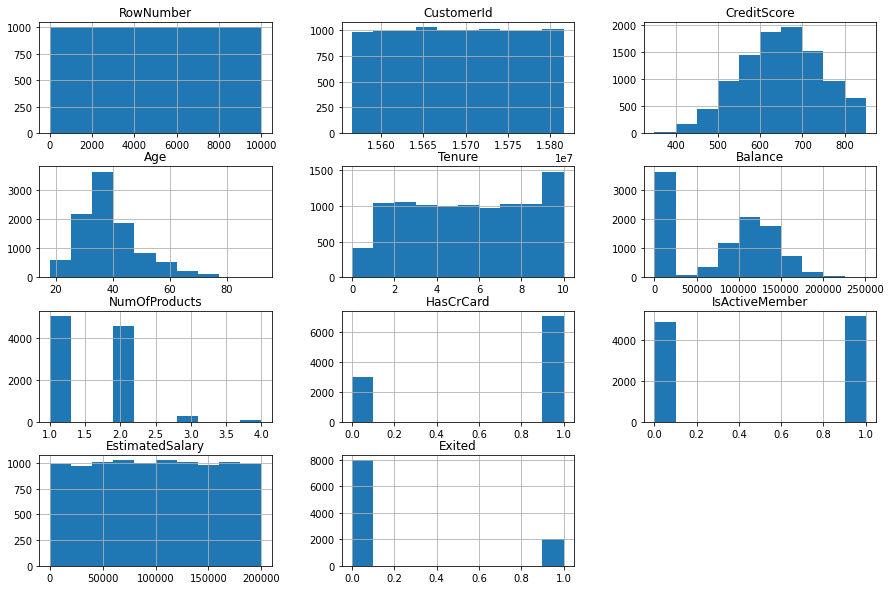

In [177]:
df.hist(figsize=(15, 10))

In [179]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Important Plots

Age-Exited Distribution

Exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

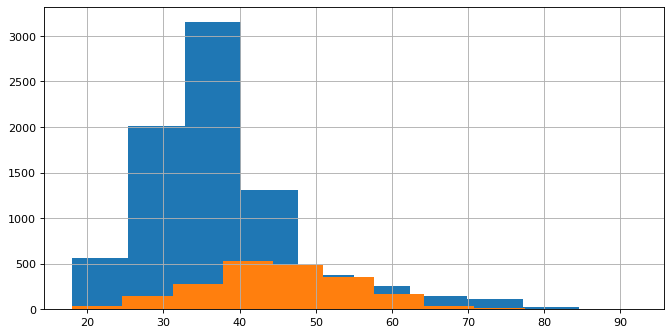

In [184]:
figure(figsize=(10, 5), dpi=80)
df.groupby(['Exited']).Age.hist()

NumOfProducts Exited Distribution

Exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NumOfProducts, dtype: object

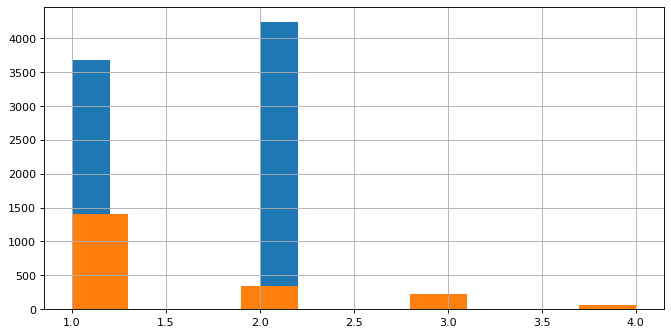

In [8]:
figure(figsize=(10, 5), dpi=80)
df.groupby(['Exited']).NumOfProducts.hist()

Gender-Exited Distribution

Exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Gender, dtype: object

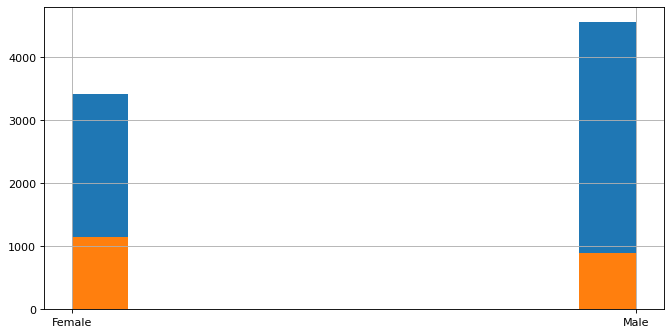

In [187]:
figure(figsize=(10, 5), dpi=80)
df.groupby(['Exited']).Gender.hist()

Account Balance plus number of accounts with Zero money

<AxesSubplot:>

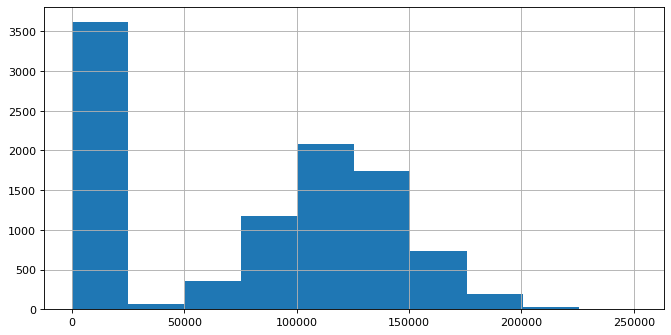

In [188]:
figure(figsize=(10, 5), dpi=80)
df.Balance.hist()

In [171]:
df['Balance'][df['Balance']== 0].count()

3617

# Correlation Heatmap

<AxesSubplot:>

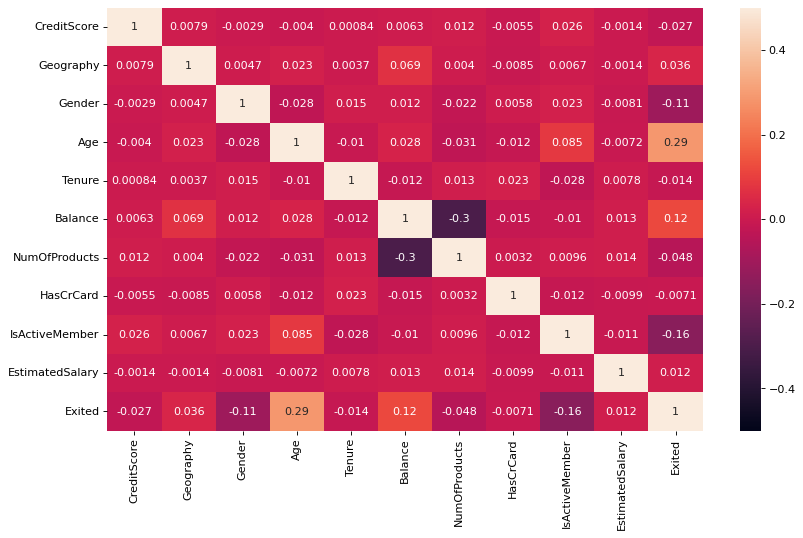

In [191]:
figure(figsize=(12, 7), dpi=80)
corr = df_cleaned.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True,
        vmin= -0.5, 
        vmax=0.5)

# Pandas Profiling for quick data overview

In [9]:
Report = ProfileReport(df, title='Churn_Report')

In [10]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]